In [ ]:
import pandas as pd
import numpy as np
import torch
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score, roc_curve, auc



In [ ]:
file_list_pos = ['124-DOD-tts_all.csv','103-DOD-tts_all.csv','120-DOD-tts_all.csv','121-DOD-tts_all.csv','122-DOD-tts_all.csv','123-DOD-tts_all.csv','101-DOD-tts_all.csv','102-DOD-tts_all.csv','104-DOD-tts_all.csv','106-DOD-tts_all.csv','108-DOD-tts_all.csv','109-DOD-tts_all.csv','110-DOD-tts_all.csv','111-DOD-tts_all.csv','112-DOD-tts_all.csv','113-DOD-tts_all.csv','114-DOD-tts_all.csv','115-DOD-tts_all.csv','117-DOD-tts_all.csv','118-DOD-tts_all.csv']
file_list_neg = ['213-DOD-tts_all.csv','214-DOD-tts_all.csv','215-DOD-tts_all.csv','216-DOD-tts_all.csv','217-DOD-tts_all.csv','218-DOD-tts_all.csv','202-DOD-tts_all.csv','203-DOD-tts_all.csv','204-DOD-tts_all.csv','205-DOD-tts_all.csv','207-DOD-tts_all.csv','209-DOD-tts_all.csv','210-DOD-tts_all.csv','211-DOD-tts_all.csv','212-DOD-tts_all.csv']


In [ ]:
# create empty arrays to store the data
X_pos = np.empty((0, 294))
X_neg = np.empty((0, 294))
y_pos = np.ones(0)
y_neg = np.zeros(0)

In [ ]:
# read and concatenate the positive data
for file in file_list_pos:
    df = pd.read_csv(file, header=0)
    X_pos = np.concatenate((X_pos, df.values))
    y_pos = np.concatenate((y_pos, np.ones(len(df))))
df

,s1,s10,s100,s101,s102,s103,s104,s105,s106,s107,...,s90,s91,s92,s93,s94,s95,s96,s97,s98,s99
0,-6.850518,-29.044506,-4.991009,1.420631,20.410086,-6.946770,7.103333,9.044143,19.949764,-7.572872,...,1.937912,18.443445,-34.500314,-18.795924,-42.799276,-13.008212,-17.272781,-0.886887,3.747091,-8.763251
1,14.584685,-15.745517,11.724917,13.017166,41.629602,51.660000,17.416352,25.669845,20.075707,-5.805461,...,-6.283510,47.076383,21.223968,-2.636846,13.325436,5.254674,-3.636204,14.907664,23.586997,1.872963
2,3.004609,26.502823,-0.442655,19.966263,32.714891,-10.813696,-3.606790,-1.007820,25.476118,-0.110212,...,-17.180381,69.517507,23.689586,20.834105,-2.277219,2.880319,14.010528,3.838456,-23.299419,-5.364819
3,34.821628,0.736197,12.994764,-23.934242,-20.089545,-64.920695,-27.410042,-9.587236,-42.133409,-6.281087,...,6.179292,-69.526289,11.237383,-3.705414,28.355553,-10.109636,15.141455,-9.862725,-7.056860,23.483120
4,44.372803,26.383753,-13.565284,-21.719613,-21.503335,5.453369,-7.001571,-33.274653,-22.711016,19.175947,...,11.432835,25.777959,16.507430,6.819935,-11.308337,26.224166,10.707200,6.209558,-17.282781,-11.628698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,-10.438343,0.763563,0.995501,-9.359670,1.393980,8.832545,-15.176528,3.536755,-1.039969,-10.086017,...,-26.120039,-24.571806,-3.848493,-12.154915,-16.577450,-16.233850,19.106911,2.719513,-2.405915,-21.852026
371,-17.079485,-26.104847,-18.109727,0.562532,-8.307925,-23.164254,-1.917287,-13.864861,-4.547703,-33.165189,...,-3.424730,6.034847,-37.143241,-16.588185,-15.667878,-7.503379,-9.688980,-13.470567,-18.751506,-15.442691
372,-32.225484,14.134854,-3.185574,11.422882,5.783495,-29.578632,19.666310,4.656368,2.370096,-0.613670,...,-5.617657,0.849588,-16.918335,0.638652,26.705673,-13.994197,2.161642,7.326210,-0.039599,9.460753
373,-10.694280,1.118810,-14.337735,4.740461,-12.737184,-27.533839,-12.327439,7.211071,-6.686127,-6.793170,...,-7.514961,23.038020,10.576374,26.598843,18.191314,15.397474,-7.342390,-8.806204,5.460058,-16.280326


In [ ]:
# read and concatenate the negative data
for file in file_list_neg:
    df = pd.read_csv(file, header=0)
    X_neg = np.concatenate((X_neg, df.values))
    y_neg = np.concatenate((y_neg, np.zeros(len(df))))
df

,s001,s002,s003,s004,s005,s006,s007,s008,s009,s010,...,s285,s286,s287,s288,s289,s290,s291,s292,s293,s294
0,-19.912384,-18.078062,14.916045,96.136721,-22.157080,-65.205713,-65.698056,44.076839,41.749397,-35.604139,...,-20.890776,-51.023686,-31.903195,-29.017396,13.651594,21.414456,39.500190,-4.204865,-173.992887,-113.067050
1,-0.626003,-30.259195,15.203211,13.360549,6.518580,-26.015850,-255.159306,68.381255,17.191708,-32.823189,...,-53.374408,32.718168,23.001357,-48.191280,11.476471,18.365609,49.168744,38.967156,-99.201904,-200.385329
2,-39.863514,-106.912506,33.690346,33.461618,49.933073,-74.188407,-104.976298,-46.696773,10.083909,-32.521913,...,73.809376,85.151320,57.583092,16.260442,19.985228,33.621014,60.929233,25.827981,39.328441,81.291920
3,72.751657,69.639107,6.063154,-40.071781,-25.440358,162.850103,-14.723150,87.044162,-7.939886,2.320697,...,82.849896,34.651947,18.458814,113.244077,-8.183915,11.275423,9.520768,35.839683,53.938292,32.602816
4,-18.117010,10.434640,36.209556,77.048607,46.385112,102.311891,161.782161,17.690777,22.037369,1.143048,...,-7.180394,-22.654356,92.580888,25.227744,-10.316810,-25.288489,-29.621690,38.425728,148.603805,96.069158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,6.785416,10.516494,12.285988,2.770832,-44.870480,-2.729061,49.642401,-45.855794,12.822562,8.880534,...,-53.724423,-48.493600,42.397361,24.781387,-20.451990,32.763812,4.590958,28.359378,-57.551494,-45.804623
371,-0.756304,-41.504456,24.208684,-97.602719,24.141050,15.477192,-60.939872,71.881030,-29.379168,14.462071,...,34.209160,55.868053,69.127227,18.200569,19.256210,46.703615,9.796888,-29.870123,-29.230635,-51.247075
372,42.827964,20.562045,45.157531,31.343080,-3.209242,-52.099753,3.627609,5.570785,-9.495092,5.575286,...,146.392352,77.691906,109.852253,101.277500,25.159962,-14.775866,16.564930,40.268341,-95.147946,-139.224131
373,26.505992,32.085705,80.225576,-41.360990,0.138803,117.292426,86.700850,-29.562057,28.753316,-28.105690,...,84.792007,27.949352,21.628399,62.822849,20.320232,16.932831,46.342235,56.680862,9.223896,42.871386


In [ ]:

from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
# split TBI-pos data into train, validation, and test sets
X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(X_pos, y_pos, test_size=0.2, random_state=42)
X_train_pos, X_val_pos, y_train_pos, y_val_pos = train_test_split(X_train_pos, y_train_pos, test_size=0.2, random_state=42)

# split TBI-neg data into train, validation, and test sets
X_train_neg, X_test_neg, y_train_neg, y_test_neg = train_test_split(X_neg, y_neg, test_size=0.2, random_state=42)
X_train_neg, X_val_neg, y_train_neg, y_val_neg = train_test_split(X_train_neg, y_train_neg, test_size=0.2, random_state=42)

# concatenate the positive and negative training data
X_train = np.concatenate((X_train_pos, X_train_neg))
y_train = np.concatenate((y_train_pos, y_train_neg))

# concatenate the positive and negative test data
X_test = np.concatenate((X_test_pos, X_test_neg))
y_test = np.concatenate((y_test_pos, y_test_neg))


In [ ]:
# Define a function to load the training data
def load_training_data():
    # Load your training data here
    X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(X_pos, y_pos, test_size=0.2, random_state=42)
    X_train_neg, X_test_neg, y_train_neg, y_test_neg = train_test_split(X_neg, y_neg, test_size=0.2, random_state=42)
    X_train = np.concatenate((X_train_pos, X_train_neg))
    y_train = np.concatenate((y_train_pos, y_train_neg))
    return X_train, y_train

In [ ]:
from sklearn.svm import SVC
# Fit an SVM model on the training data
svm = SVC()
svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svm = svm.predict(X_test)

# Evaluate the performance of the model
print("SVM F1 score:", f1_score(y_test, y_pred_svm))
print("SVM Precision:", precision_score(y_test, y_pred_svm))
print("SVM Recall:", recall_score(y_test, y_pred_svm))
print("SVM Confusion matrix:\n", confusion_matrix(y_test, y_pred_svm))

SVM F1 score: 0.9065479974570883
SVM Precision: 0.8663426488456865
SVM Recall: 0.9506666666666667
SVM Confusion matrix:
 [[ 905  220]
 [  74 1426]]


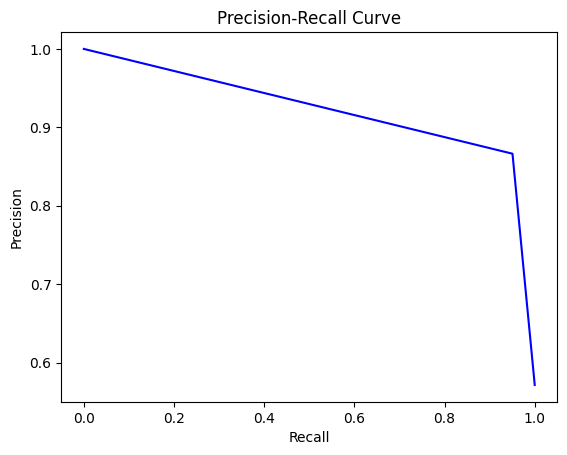

In [ ]:
from sklearn.metrics import precision_recall_curve


# Calculate precision and recall values for different threshold values
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_svm)

# Plot the precision-recall curve
plt.plot(recall, precision, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


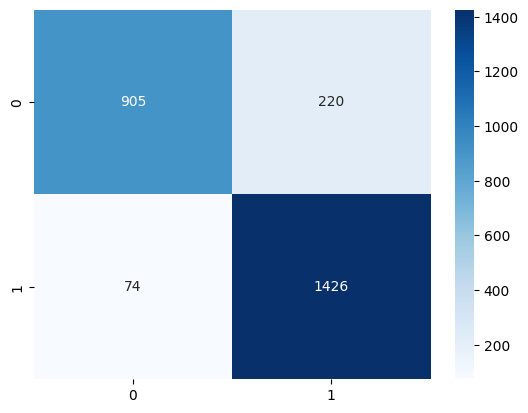

In [ ]:
confusion_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(confusion_svm, annot=True, cmap='Blues', fmt='g')
#plt.xlabel('Predicted labels')
#plt.ylabel('True labels')
plt.show()

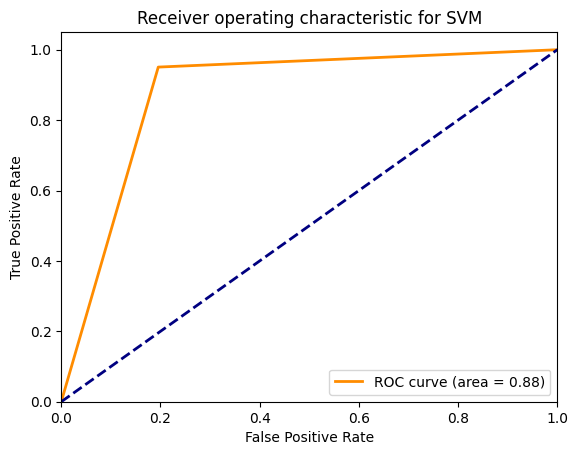

In [ ]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for GBC
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC curve for SVM
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for SVM')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Evaluate the model's performance using accuracy score
from sklearn.metrics import accuracy_score
import numpy as np

accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy) 

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(y_test, y_pred_svm))
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Square Error (MSE)
mse = np.mean((y_test - y_pred_svm) ** 2)
print("Mean Square Error (MSE):", mse)

# Calculate Root Mean Square Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Square Error (RMSE):", rmse)


Accuracy: 0.888
Mean Absolute Error (MAE): 0.5714285714285714
Mean Square Error (MSE): 0.0
Root Mean Square Error (RMSE): 0.0


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

file_list = ['1162_tts_all.csv','124-DOD-tts_all.csv','103-DOD-tts_all.csv','120-DOD-tts_all.csv','121-DOD-tts_all.csv','122-DOD-tts_all.csv','123-DOD-tts_all.csv','101-DOD-tts_all.csv','102-DOD-tts_all.csv','104-DOD-tts_all.csv','106-DOD-tts_all.csv','108-DOD-tts_all.csv','109-DOD-tts_all.csv','110-DOD-tts_all.csv','111-DOD-tts_all.csv','112-DOD-tts_all.csv','113-DOD-tts_all.csv','114-DOD-tts_all.csv','115-DOD-tts_all.csv','117-DOD-tts_all.csv','118-DOD-tts_all.csv','213-DOD-tts_all.csv','214-DOD-tts_all.csv','215-DOD-tts_all.csv','216-DOD-tts_all.csv','217-DOD-tts_all.csv','218-DOD-tts_all.csv','202-DOD-tts_all.csv','203-DOD-tts_all.csv','204-DOD-tts_all.csv','205-DOD-tts_all.csv','207-DOD-tts_all.csv','209-DOD-tts_all.csv','210-DOD-tts_all.csv','211-DOD-tts_all.csv','212-DOD-tts_all.csv']

for file in file_list:
    # Read in the patient data from a CSV file
    df_patient = pd.read_csv(file, header=0)

    # extract the values from the DataFrame and convert them to NumPy arrays
    X_patient = df_patient.values

    # Load the trained SVM classifier model
    svc = SVC(kernel='rbf', C=10, gamma=0.1)

    # Fit the model on the training data
    X_train, y_train = load_training_data()
    svc.fit(X_train, y_train)

    # Make predictions on the patient data
    y_pred = svc.predict(X_patient)

    # Output the predicted value for each patient
    if y_pred[0] == 1:
        print(file + " - The patient has TBI")
    else:
        print(file + " - The patient does not have TBI")
        

1162_tts_all.csv - The patient has TBI
124-DOD-tts_all.csv - The patient has TBI
103-DOD-tts_all.csv - The patient has TBI
120-DOD-tts_all.csv - The patient has TBI
121-DOD-tts_all.csv - The patient has TBI
122-DOD-tts_all.csv - The patient has TBI
123-DOD-tts_all.csv - The patient has TBI
101-DOD-tts_all.csv - The patient has TBI
102-DOD-tts_all.csv - The patient has TBI
104-DOD-tts_all.csv - The patient has TBI
106-DOD-tts_all.csv - The patient has TBI
108-DOD-tts_all.csv - The patient has TBI
109-DOD-tts_all.csv - The patient has TBI
110-DOD-tts_all.csv - The patient has TBI
111-DOD-tts_all.csv - The patient has TBI
112-DOD-tts_all.csv - The patient has TBI
113-DOD-tts_all.csv - The patient has TBI
114-DOD-tts_all.csv - The patient has TBI
115-DOD-tts_all.csv - The patient has TBI
117-DOD-tts_all.csv - The patient has TBI
118-DOD-tts_all.csv - The patient has TBI
213-DOD-tts_all.csv - The patient does not have TBI
214-DOD-tts_all.csv - The patient does not have TBI
215-DOD-tts_all.c